In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score

url = "https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Churn_Modelling.xls"
df = pd.read_csv(url, index_col='RowNumber')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [ ]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [ ]:
df.shape

(10000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df['Exited'].value_counts()/len(df)*100

,count
Exited,
0,79.63
1,20.37


In [ ]:
churn_rate = df['Exited'].value_counts()/len(df)*100

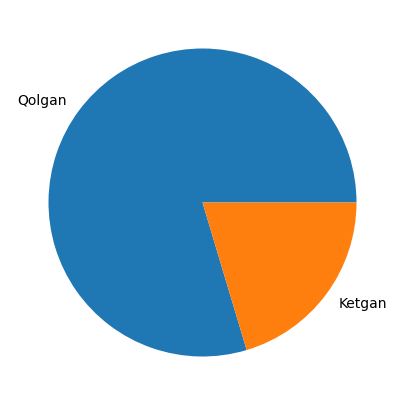

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Qolgan','Ketgan'])
plt.show()

In [ ]:
df.corrwith(df['Exited'], numeric_only=True).abs().sort_values(ascending=False)

,0
Exited,1.000000
Age,0.285323
IsActiveMember,0.156128
Balance,0.118533
NumOfProducts,0.047820
CreditScore,0.027094
Tenure,0.014001
EstimatedSalary,0.012097
HasCrCard,0.007138


sonli ustunlarni tahlil qilamiz

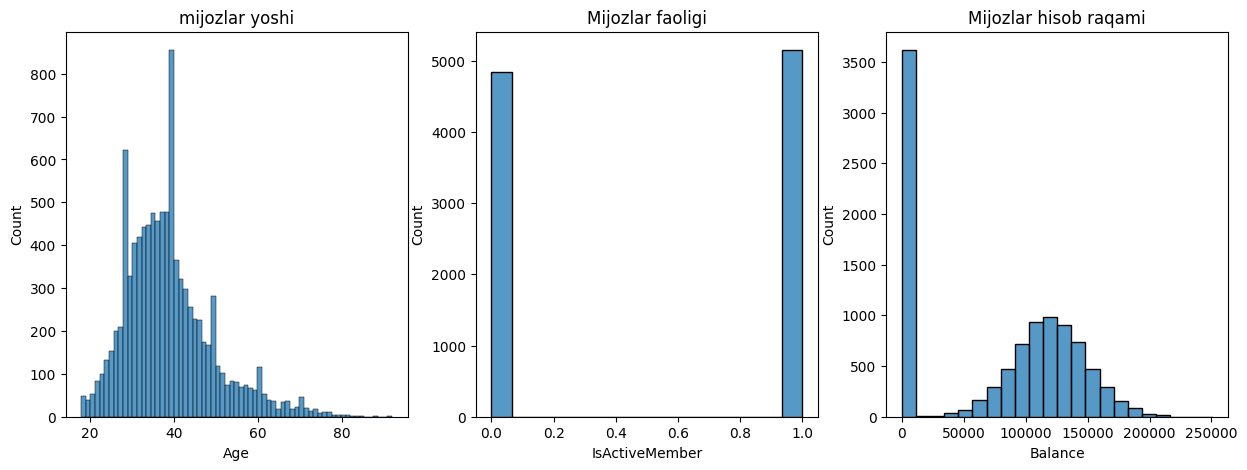

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,5))


sns.histplot(x="Age", data=df, ax=axes[0])
axes[0].set_title("mijozlar yoshi")


sns.histplot(x="IsActiveMember", data=df, ax=axes[1])
axes[1].set_title("Mijozlar faoligi")


sns.histplot(x="Balance", data=df, ax=axes[2])
axes[2].set_title("Mijozlar hisob raqami")

plt.show()

kategorikal ustunlarni tahlil qilamiz

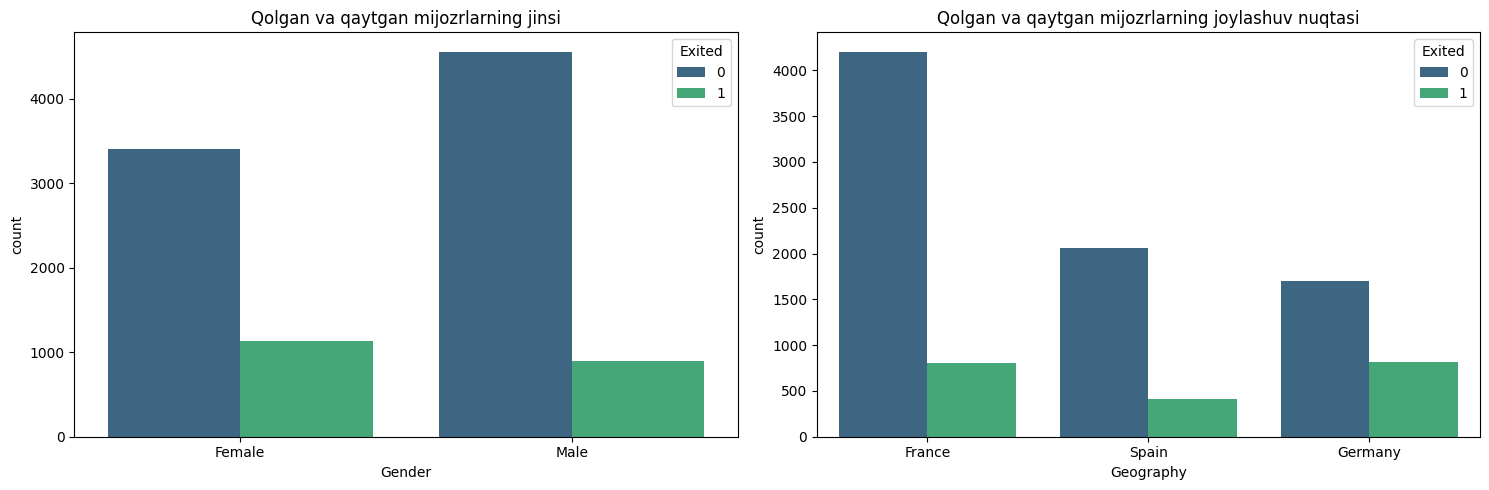

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x='Gender', hue='Exited', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozrlarning jinsi")
sns.countplot(x='Geography', hue='Exited', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Qolgan va qaytgan mijozrlarning joylashuv nuqtasi")
plt.tight_layout()
plt.show()

In [ ]:
label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
if 'Geography' in df.columns:
    df=pd.get_dummies(df, columns=['Geography'],drop_first=True)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,
1,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
2,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
3,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
4,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
5,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,1,39,5,0.00,2,1,0,96270.64,0,False,False
9997,516,1,35,10,57369.61,1,1,1,101699.77,0,False,False
9998,709,0,36,7,0.00,1,0,1,42085.58,1,False,False


In [ ]:
x=df.drop('Exited', axis=1)
y=df['Exited']

In [ ]:
scaler = StandardScaler()
X= scaler.fit_transform(x)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.58      0.22      0.32       407

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000

Model aniqligi: 0.809


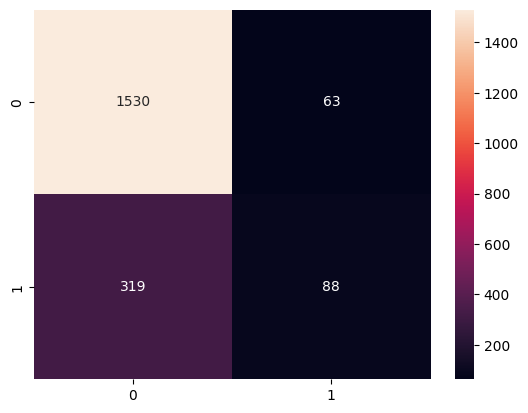

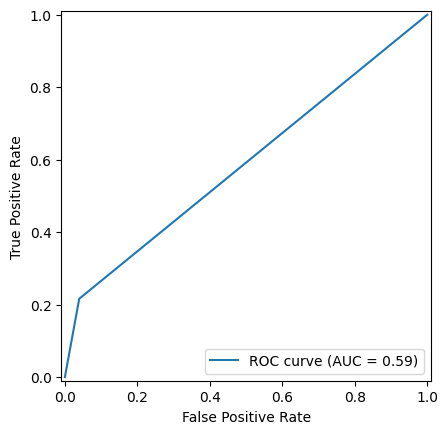

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1593
           1       0.83      0.35      0.50       407

    accuracy                           0.85      2000
   macro avg       0.84      0.67      0.71      2000
weighted avg       0.85      0.85      0.83      2000

Model aniqligi: 0.854


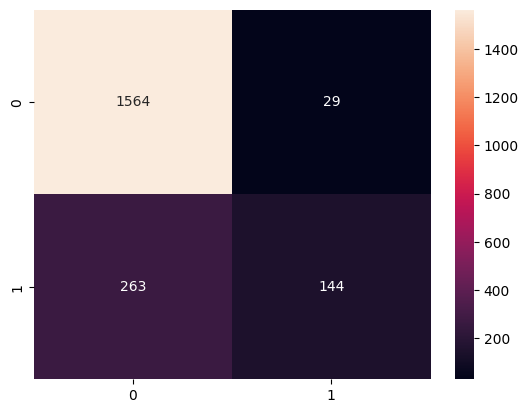

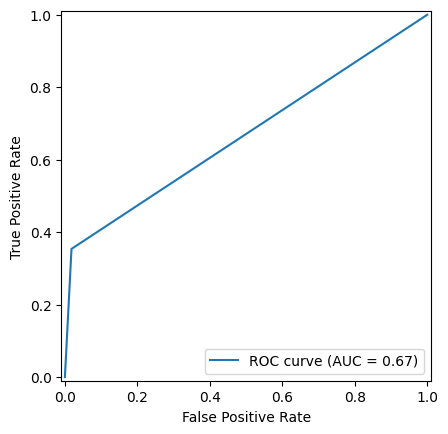

In [ ]:
# Modelni yaratamiz (training)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1593
           1       0.50      0.49      0.50       407

    accuracy                           0.80      2000
   macro avg       0.69      0.68      0.69      2000
weighted avg       0.80      0.80      0.80      2000

Model aniqligi: 0.798


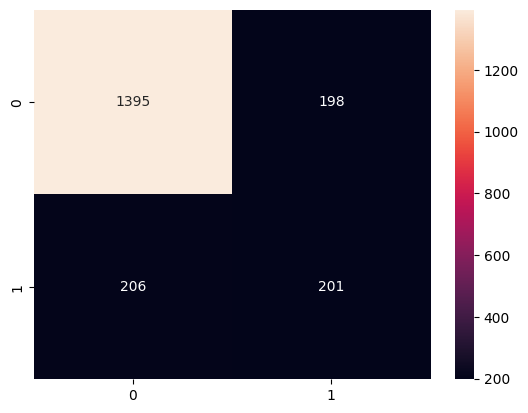

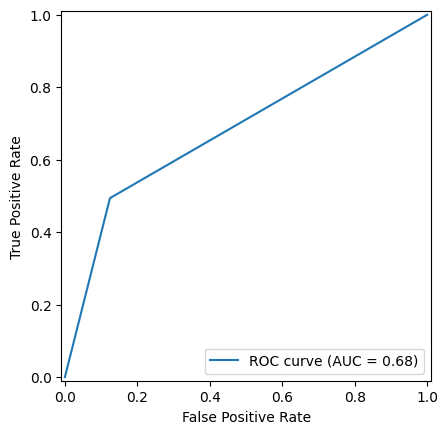

In [ ]:
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

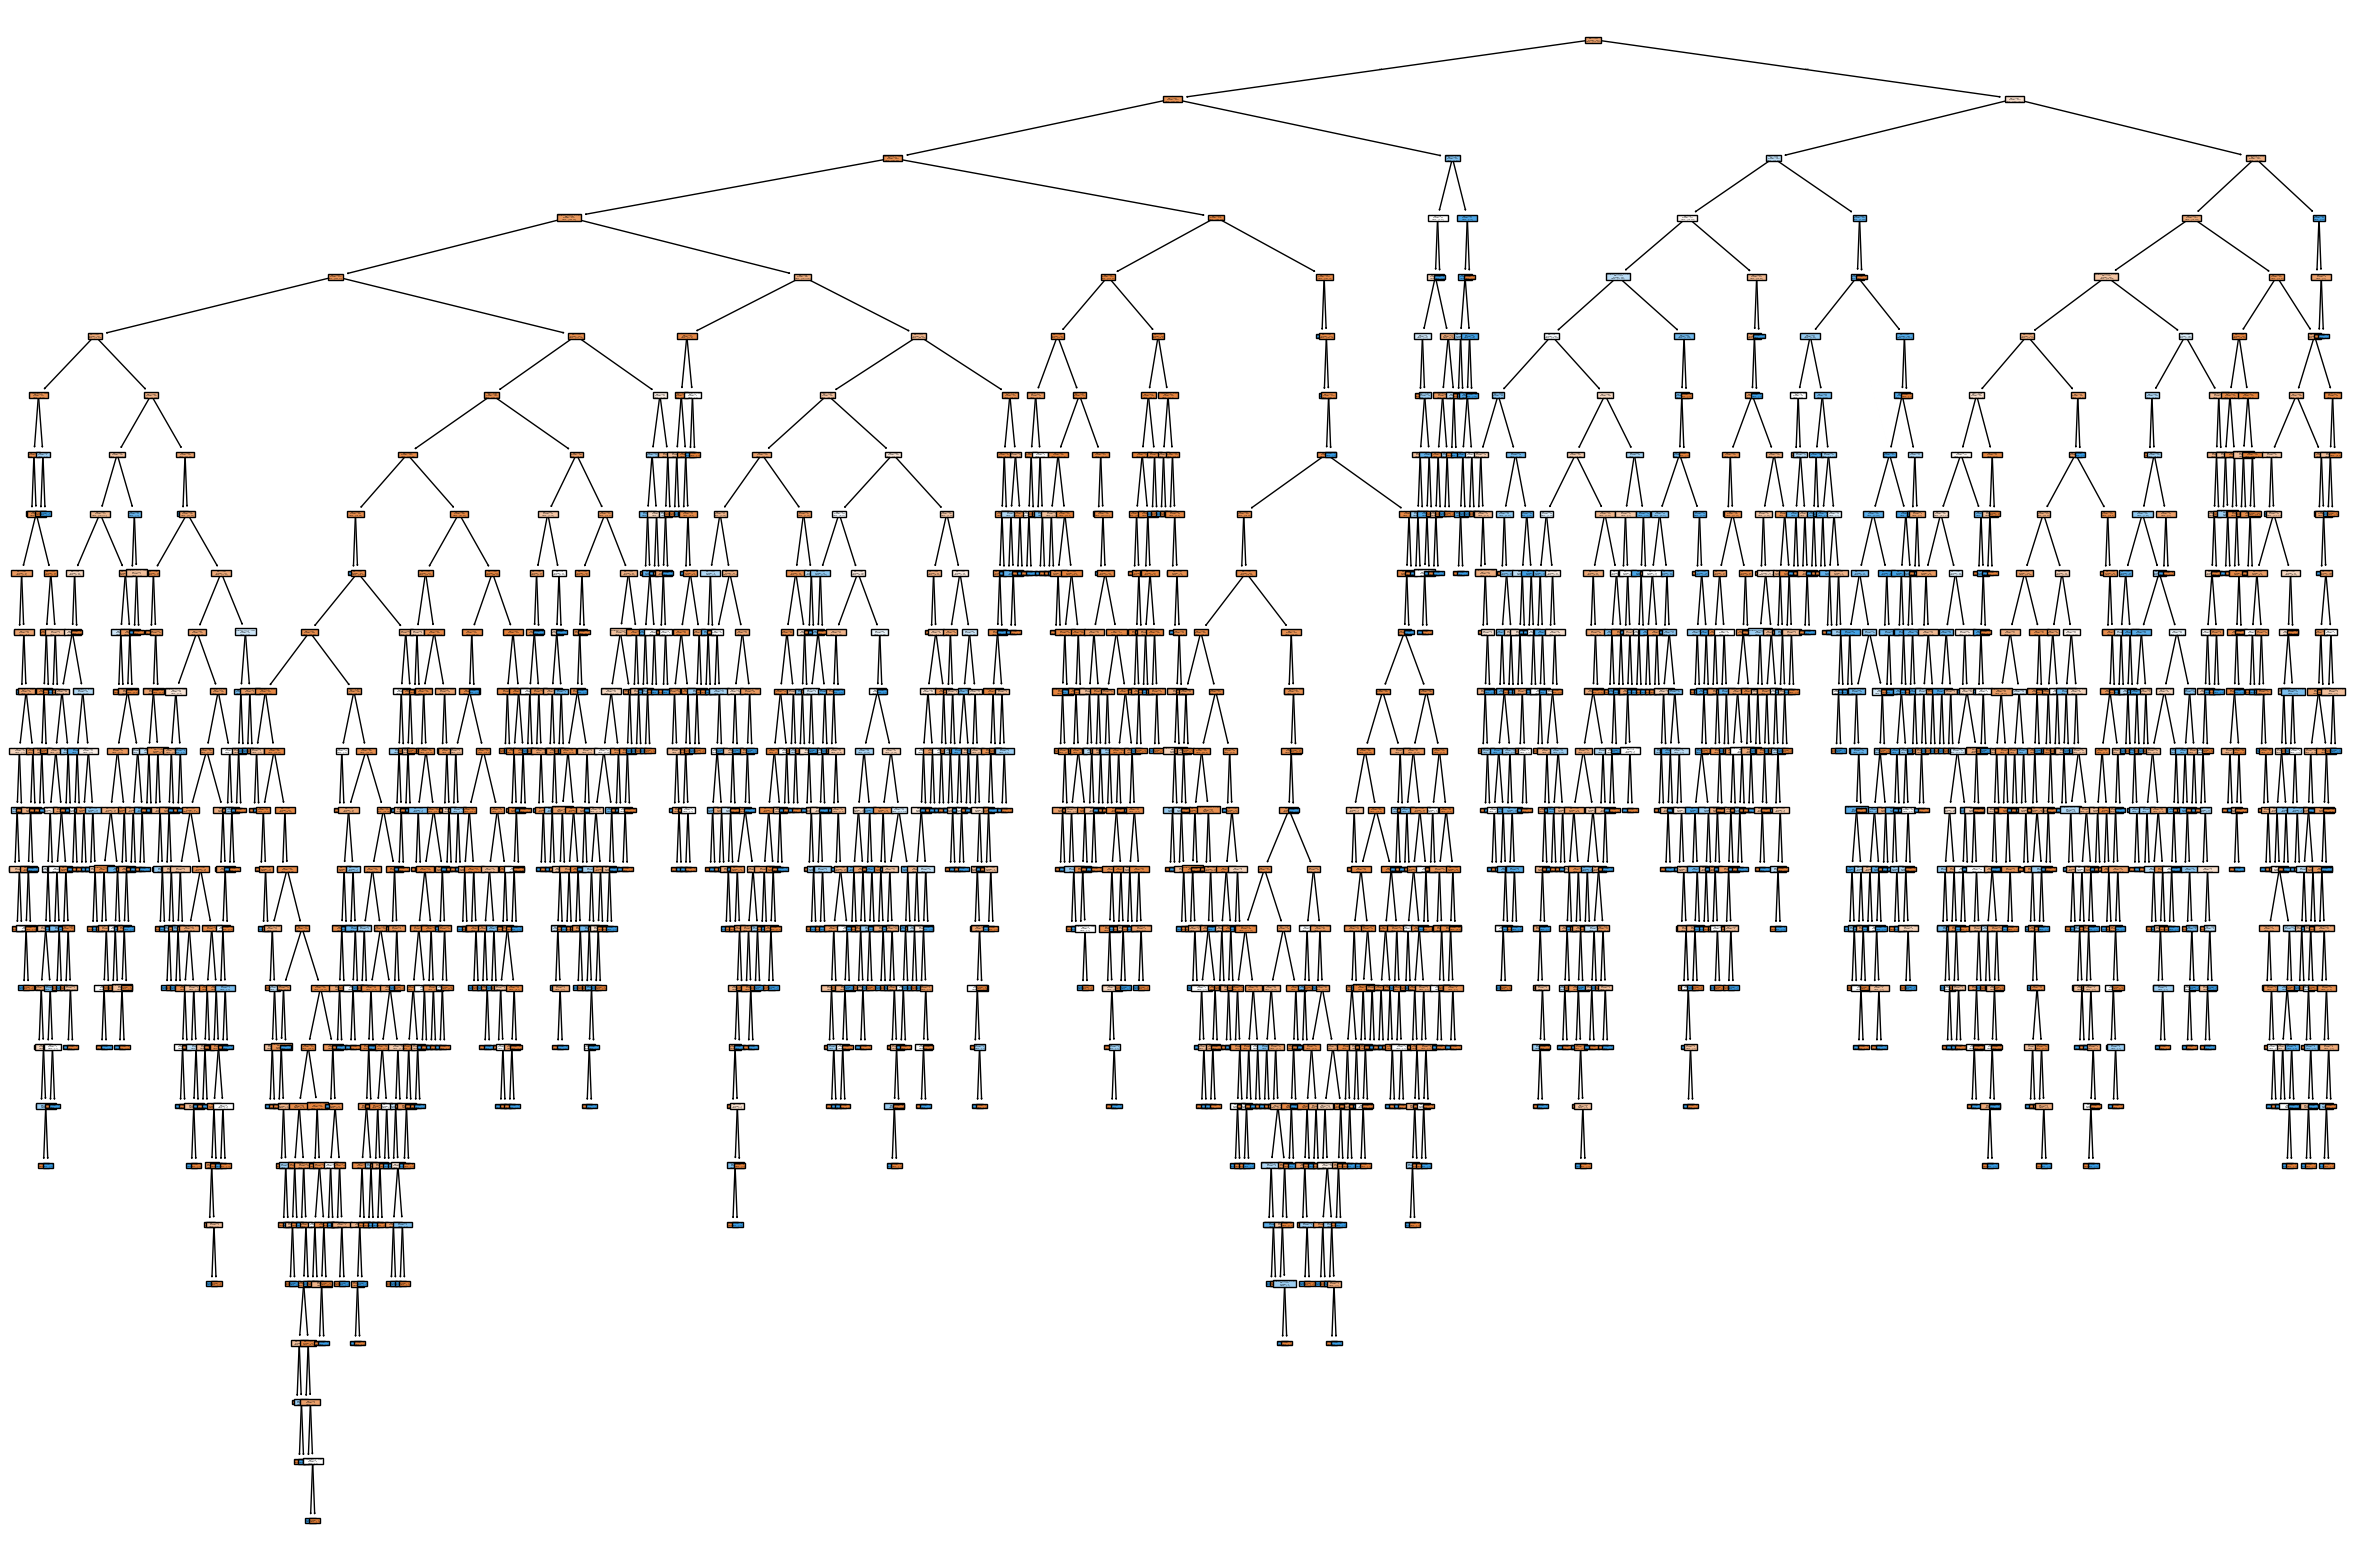

In [ ]:
cols = x.columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1593
           1       0.65      0.47      0.55       407

    accuracy                           0.84      2000
   macro avg       0.76      0.70      0.73      2000
weighted avg       0.83      0.84      0.83      2000

Model aniqligi: 0.841


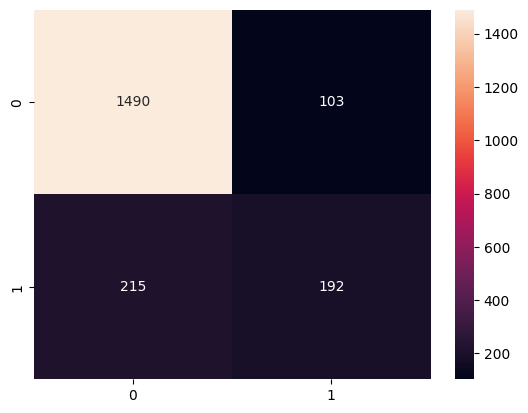

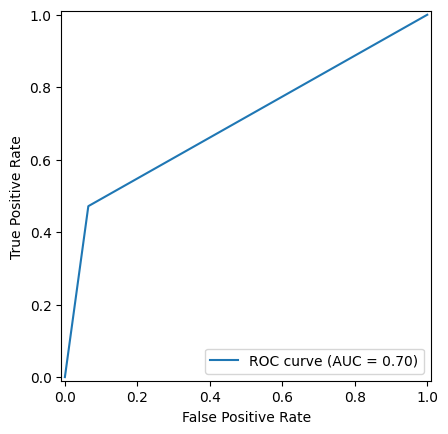

In [ ]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.71      0.46      0.56       407

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000

Model aniqligi: 0.8515


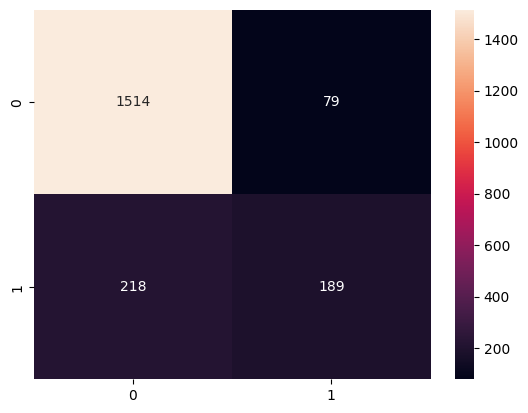

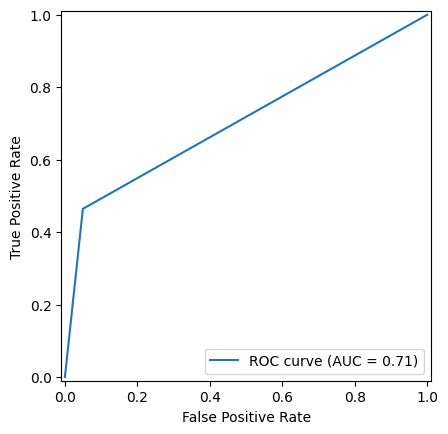

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()


fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [ ]:
import pickle

filename = 'xgb_model.pkl'
pickle.dump(xgb_model, open(filename, 'wb'))

print(f"Model saved as {filename}")

Model saved as xgb_model.pkl
